In [180]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [181]:
thyroid = pd.read_csv('newthyroid.txt', sep=",",header=None)
thyroid.columns = ['class','feature1','feature2','feature3','feature4','feature5']
thyroid = thyroid.drop(labels=0, axis=0)
thyroid.reset_index(drop=True, inplace=True)
thyroid


,class,feature1,feature2,feature3,feature4,feature5
0,n,107,10.1,2.2,0.9,2.7
1,n,113,9.9,3.1,2,5.9
2,n,127,12.9,2.4,1.4,0.6
3,n,109,5.3,1.6,1.4,1.5
4,n,105,7.3,1.5,1.5,-0.1
...,...,...,...,...,...,...
180,h,88,16.5,4.9,0.8,0.1
181,h,97,15.1,1.8,1.2,-0.2
182,h,106,13.4,3,1.1,0
183,h,79,19,5.5,0.9,0.3


In [182]:
X = thyroid[['feature1','feature2','feature3','feature4','feature5']]
y = thyroid["class"].map({'n': 1, 'h': 0})


In [183]:
# splitting data into train and test set with 10 times repeat split
# 1st
x_train1, x_test1, y_train1, y_test1 = train_test_split(
    X, y, test_size=0.3, random_state=1)
# 2nd
x_train2, x_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.3, random_state=2)
# 3rd
x_train3, x_test3, y_train3, y_test3 = train_test_split(
    X, y, test_size=0.3, random_state=3)
# 4th
x_train4, x_test4, y_train4, y_test4 = train_test_split(
    X, y, test_size=0.3, random_state=4)
# 5th
x_train5, x_test5, y_train5, y_test5 = train_test_split(
    X, y, test_size=0.3, random_state=5)
# 6th
x_train6, x_test6, y_train6, y_test6 = train_test_split(
    X, y, test_size=0.3, random_state=6)
# 7th
x_train7, x_test7, y_train7, y_test7 = train_test_split(
    X, y, test_size=0.3, random_state=7)
# 8th
x_train8, x_test8, y_train8, y_test8 = train_test_split(
    X, y, test_size=0.3, random_state=8)
# 9th
x_train9, x_test9, y_train9, y_test9 = train_test_split(
    X, y, test_size=0.3, random_state=9)
# 10th
x_train10, x_test10, y_train10, y_test10 = train_test_split(
    X, y, test_size=0.3, random_state=10)


In [184]:
X_train = [x_train1, x_train2, x_train3, x_train4, x_train5,
           x_train6, x_train7, x_train8, x_train9, x_train10]
y_train = [y_train1, y_train2, y_train3, y_train4, y_train5,
           y_train6, y_train7, y_train8, y_train9, y_train10]
X_test = [x_test1, x_test2, x_test3, x_test4, x_test5,
          x_test6, x_test7, x_test8, x_test9, x_test10]
y_test = [y_test1, y_test2, y_test3, y_test4, y_test5,
          y_test6, y_test7, y_test8, y_test9, y_test10]
X_test[0]


,feature1,feature2,feature3,feature4,feature5
16,111,8.4,1.5,0.8,1.2
179,105,12,3.3,1.1,0
66,118,10.5,2.1,0.7,3.5
40,121,10.1,2.4,0.8,3
166,80,23,10,0.9,-0.1
155,65,18.2,10,1.3,0.1
97,110,8.4,1.4,1,1.9
177,110,15.2,1.9,0.7,-0.2
35,117,11,1.4,1.5,2.1
54,106,9.4,1.7,0.9,3.1


In [185]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda_auc = []
lda = LDA()
for i,j in zip(range(0, 9), range(0, 9)):
    X_trainl = lda.fit_transform(X_train[i], y_train[j])
for n in range(0, 9):
    lda_auc.append(roc_auc_score(lda.predict(X_test[n]),y_test[n]))
print('AUC values of LDA: ', lda_auc)


AUC values of LDA:  [0.9705882352941176, 1.0, 0.9891304347826086, 0.9772727272727273, 0.9803921568627452, 0.97, 0.9893617021276595, 0.9555555555555555, 0.9888888888888889]


In [199]:
# defining the range of K values to choose from
params = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}

# k fold = 5 for cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# pruning with cross validation
knn = KNeighborsClassifier()
gcv = GridSearchCV(estimator=knn, param_grid=params, cv=kf, scoring='roc_auc')
gcv.fit(X, y)

# showing what k value gives the highest AUC
print(gcv.best_estimator_)


KNeighborsClassifier(n_neighbors=3)


In [187]:
# creating an empty array for recording the 10 test AUC scores
knn_auc = []

# KNN model deployment
for i, j in zip(range(0, len(X_train)), range(0, len(y_train))):
    knn = KNeighborsClassifier().fit((X_train[i]), y_train[j])
for n in range(0, len(X_test)):
    knn_auc.append(roc_auc_score(knn.predict((
        X_test[n])),(y_test[n])))

print('AUC values of Knn: ', knn_auc)


AUC values of Knn:  [0.9897959183673469, 0.9886363636363636, 0.9787234042553192, 0.9883720930232558, 1.0, 0.9795918367346939, 0.9893617021276595, 0.9767441860465116, 0.9888888888888889, 1.0]


<AxesSubplot:>

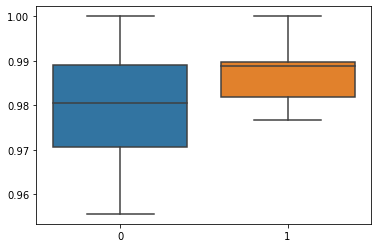

In [197]:


np.random.seed(111)

all_arr = [lda_auc,knn_auc]

sns.boxplot(data=all_arr)
